# Data Science and Machine Learning__COMP4030__Coursework 2023 CW2

**Program editor**: yifan Wu;Hongkai Wu  
**github**:https://github.com/WuYifan-star/HandGestureRecognition.git  
**contribute**:  
*yifan WU(20442508)*: The part of code that about how to use MLP to make a hand gesture recognitiaon system.  
*hongkai WU()*:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch
from sklearn import preprocessing
from scipy.signal import savgol_filter
import math
from pandas.core.frame import DataFrame
import random
import torch
from IPython import display
#from d2l import torch as d2l
from torch.utils import data
#import data_processing
import torch
from torch import nn
import matplotlib_inline.backend_inline

### data preprocessing(MLP) yifan wu

In [2]:
def read_csv(file_names):
    data_list = []
    for i in range(len(file_names)):
        for j in range(5):
            data_file = os.path.join('data', file_names[i] + '_' + str(j+1)+'.csv')
            locals()[file_names[i]+'_'+str(j+1)] = pd.read_csv(data_file)
            data_list.append([locals()[file_names[i]+'_'+str(j+1)],file_names[i]])
    return data_list
def read_test_csv(file_names):
    data_list = []
    for i in range(len(file_names)):
        for j in range(5):
            data_file = os.path.join('data_test', file_names[i] +'_test'+ '_' + str(j+1)+'.csv')
            locals()[file_names[i]+'_'+str(j+1)] = pd.read_csv(data_file)
            data_list.append([locals()[file_names[i]+'_'+str(j+1)],file_names[i]])
    return data_list

In [3]:
def filter_data(data_list):
    for i in range(20):
        for j in range(3):
            data_list[i][0].iloc[:,j] = savgol_filter(list(data_list[i][0].iloc[:,j]), 55, 2, mode= 'nearest')
    return data_list

In [4]:
def normalization(data_list):
    for i in range(20):
        for j in range(3):
            _range = data_list[i][0].iloc[:,j].max() - data_list[i][0].iloc[:,j].min()
            data_list[i][0].iloc[:,j] = (data_list[i][0].iloc[:,j] - data_list[i][0].iloc[:,j].min()) / _range
    
    return data_list

In [5]:
def show_img(file_names, data_list):
    fig = plt.figure(figsize=(16,16),dpi=300)
    index = 0
    for i in range(len(file_names)):
        for j in range(5):
            index = index + 1
            locals()['ax'+'_'+str(index)] = fig.add_subplot(10,2,index)
            for k in range(3): 
                x = range(len(data_list[index - 1][0].iloc[:,k]))
                y = data_list[index - 1][0].iloc[:,k]
                title = data_list[index - 1][1] + "_" + str(j + 1)
                locals()['ax'+'_'+str(index)].set_title(title)
                locals()['ax'+'_'+str(index)].plot(x, y)
    fig.legend(['Linear Acceleration x','Linear Acceleration y','Linear Acceleration z'],loc = 'upper right') 
    plt.tight_layout()
    plt.show()

In [6]:
def data_preprocessing(data_list):
    for data in data_list:
        data[0].drop(labels=['Time (s)', 'Absolute acceleration (m/s^2)'], axis=1, inplace = True)
        #number_del = int(data_list[0][0].shape[0]/13)
        data[0].drop(data[0].tail(100).index, inplace = True)
        data[0].drop(data[0].head(50).index, inplace = True)
        data[0] =  data[0].reset_index(drop=True)     

In [7]:
## two method about data cutting
def data_cut(data_list):
    down_line = 0.4
    temp_list = []
    temp_list2 = []
    local_minimum = []
    cutting_data = []
#     for i in range(len(data_list)):
#         for j in range(len(data_list[i][0]) - 1):
#             if(data_list[i][0].iloc[j,2] > 0.4 and data_list[i][0].iloc[j+1,2] < 0.4):
#                 temp_list.append(j)
#         for k in range(len(temp_list) - 1):
#             temp_list2.append(list(data_list[i][0].iloc[:,2]).index(min(list(data_list[i][0].iloc[:,2])[temp_list[k]:temp_list[k + 1]])))
#         local_minimum.append(temp_list2)
#         temp_list = []
#         temp_list2 = []
#     for i in range(len(local_minimum)):
#         for j in range(len(local_minimum[i])-1):
#             temp_list.append(list(data_list[i][0].iloc[:,0])[local_minimum[i][j]:local_minimum[i][j + 1]])
#             temp_list.append(list(data_list[i][0].iloc[:,1])[local_minimum[i][j]:local_minimum[i][j + 1]])
#             temp_list.append(list(data_list[i][0].iloc[:,2])[local_minimum[i][j]:local_minimum[i][j + 1]])
#             cutting_data.append([temp_list, data_list[i][1]])
#             temp_list = []
#     for i in range(len(cutting_data)):
#         if(len(cutting_data[i][0][0]) < 50):
#             cutting_data.pop(i)
#     for i in range(len(cutting_data)):
#         if(len(cutting_data[i][0][0]) < 80):
#             while(len(cutting_data[i][0][0]) != 80):
#                 random_index = random.randint(0, len(cutting_data[i][0][0])-2)
#                 cutting_data[i][0][0].insert(random_index+1, (cutting_data[i][0][0][random_index] + cutting_data[i][0][0][random_index + 1])/2)
#                 cutting_data[i][0][1].insert(random_index+1, (cutting_data[i][0][0][random_index] + cutting_data[i][0][0][random_index + 1])/2)
#                 cutting_data[i][0][2].insert(random_index+1, (cutting_data[i][0][0][random_index] + cutting_data[i][0][0][random_index + 1])/2)
#         elif(len(cutting_data[i][0][0]) > 80):
#             while(len(cutting_data[i][0][0]) != 80):
#                 random_index = random.randint(0, len(cutting_data[i][0][0])-2)
#                 cutting_data[i][0][0].pop(random_index) 
#                 cutting_data[i][0][1].pop(random_index) 
#                 cutting_data[i][0][2].pop(random_index)
#----------------------------------------------------------------
    start_index = 0
    end_index = 240
    for i in range(len(data_list)):
        while(end_index < len(list(data_list[i][0].iloc[:,0]))):
            temp_list.append(list(data_list[i][0].iloc[:,0])[start_index:end_index])
            temp_list.append(list(data_list[i][0].iloc[:,1])[start_index:end_index])
            temp_list.append(list(data_list[i][0].iloc[:,2])[start_index:end_index])
            cutting_data.append([temp_list, data_list[i][1]])
            end_index = end_index + 20
            start_index = start_index + 20
            temp_list = []
        start_index = 0
        end_index = 240
    return cutting_data

In [8]:
def data_transfer_list(data_list, label):
    image_list = []
    label_list = []
    tran_list = []
    tran1_list = []
    label_tran_list = []
    cutting_data = []
    cutting_data = data_cut(data_list)
    random.shuffle(cutting_data) 
    random_index = []
#     for i in range(len(cutting_data)):
#         for j in range(len(cutting_data)):
#             if(cutting_data[i][1] == cutting_data[j][1] and i != j):
#                 tran_list = [cutting_data[i][0][0]+cutting_data[j][0][0],cutting_data[i][0][1]+cutting_data[j][0][1],cutting_data[i][0][2]+cutting_data[j][0][2]]
#                 tran1_list.append(tran_list)
#                 label_tran_list.append(cutting_data[i][1])
#             tran_list = []
#     for i in range(len(tran1_list)):
#         for j in range(4):
#             random_index.append(random.randint(0, len(cutting_data)-2))
#         for j in random_index:
#             if(label_tran_list[i] == cutting_data[j][1]):
#                 tran_list = [tran1_list[i][0]+cutting_data[j][0][0],tran1_list[i][1]+cutting_data[j][0][1],tran1_list[i][2]+cutting_data[j][0][2]]
#                 image_list.append(tran_list)
#                 label_list.append(label_tran_list[i])
#             tran_list = []
#         random_index = []
    for i in range(len(cutting_data)):
        image_list.append(cutting_data[i][0])
        label_list.append(cutting_data[i][1])
    label_encoder = preprocessing.LabelEncoder()
    label_list = list(label_encoder.fit_transform(label_list))
    return image_list, label_list

### MLP model(MLP) yifan wu 
This part of the code references the book "Dive into Deep Learning".  
Li, M., Zhang, A., Lipton, Z. and J. Smola, A. (2023). Dive Into Deep Learning. [online] Available at: https://d2l.ai/.

In [9]:
def accuracy(y_hat, y): 
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [10]:
def use_svg_display():  
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [11]:
def set_figsize(figsize=(3.5, 2.5)): 
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [12]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [13]:
def get_dataloader_workers(): 
    return 0

In [14]:
def load_array(data_arrays, batch_size):
    dataset = data.TensorDataset(*data_arrays)
    length=len(dataset)
    train_size = int(0.8*length)
    test_size = length - train_size
    train, test = torch.utils.data.random_split(dataset,[train_size,test_size])
    return (data.DataLoader(train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [15]:
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [16]:
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [17]:
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
        metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [18]:
def evaluate_accuracy(net, data_iter): 
    if isinstance(net, torch.nn.Module):
        net.eval() 
    metric = Accumulator(2) 
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [19]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        print("epoch:",epoch + 1)
        print("test_acc",test_acc)
        print("train_loss",train_metrics[0])
        print("train_acc",train_metrics[1])
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

### Training(MLP) yifan wu

In [20]:
file_names = ['circle', 'comeHere', 'goAway', 'wave']
label = file_names
data_list = []
image_list = []
label_list = []
data_list = read_csv(file_names)
data_preprocessing(data_list)
#data_list = filter_data(data_list)
data_list = normalization(data_list)
image_list, label_list = data_transfer_list(data_list, label)
X, y = torch.tensor(image_list), torch.tensor(label_list)

In [21]:
num_input = 720
num_h1 = 256
num_h2 = 128
num_h3 = 64
num_output = 4
batch_size = 64
lr = 0.001
num_epochs = 800
weight_decay = 0.001

In [22]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_input, num_h1),
                    nn.ReLU(),
#                      nn.Linear(num_h2, num_h3),
#                      nn.ReLU(),
#                     nn.Linear(num_h1, num_h3),
#                     nn.ReLU(),
                    nn.Linear(num_h1, num_output))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [23]:
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=weight_decay)

In [24]:
train_iter, test_iter = load_array((X, y), batch_size)

epoch: 800
test_acc 0.923469387755102
train_loss 0.2858101807030377
train_acc 0.9501915708812261


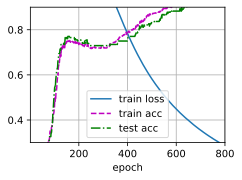

In [25]:
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### Testing (MLP) yifan wu

In [26]:
file_names = ['circle', 'comeHere', 'goAway', 'wave']
label = file_names
data_list_circle = []
data_list_comeHere = []
data_list_goAway = []
data_list_wave = []
data_list = []
image_list = []
label_list = []
data_list = read_test_csv(file_names)
data_preprocessing(data_list)

In [27]:
data_list = filter_data(data_list)
data_list = normalization(data_list)
y = data_list[15][0].iloc[:,0]
x = range(len(data_list[15][0].iloc[:,0]))
for i in range(len(data_list)):
    if(data_list[i][1] == 'circle'):
        data_list_circle.append(data_list[i])
    elif(data_list[i][1] == 'comeHere'):
        data_list_comeHere.append(data_list[i])
    elif(data_list[i][1] == 'goAway'):
        data_list_goAway.append(data_list[i])
    elif(data_list[i][1] == 'wave'):
        data_list_wave.append(data_list[i])
image_list_circle, label_list_circle = data_transfer_list(data_list_circle, label)
image_list_comeHere, label_list_comeHere = data_transfer_list(data_list_comeHere, label)
image_list_goAway, label_list_goAway = data_transfer_list(data_list_goAway, label)
image_list_wave, label_list_wave = data_transfer_list(data_list_wave, label)
image_list, label_list = data_transfer_list(data_list, label)
X_circle, y_circle = torch.tensor(image_list_circle), torch.tensor(label_list_circle)
X_comeHere, y_comeHere = torch.tensor(image_list_comeHere), torch.tensor(label_list_comeHere)
X_goAway, y_goAway = torch.tensor(image_list_goAway), torch.tensor(label_list_goAway)
X_wave, y_wave = torch.tensor(image_list_wave), torch.tensor(label_list_wave)

In [28]:
#net = torch.load('model/net_parameters.pth')

In [29]:
y_hat_circle = net(X_circle)
y_hat_comeHere = net(X_comeHere)
y_hat_goAway = net(X_goAway)
y_hat_wave = net(X_wave)
accuracy_circle = accuracy(y_hat_circle, y_circle)/ len(y_hat_circle)
accuracy_comeHere = accuracy(y_hat_comeHere, y_comeHere)/ len(y_hat_comeHere)
accuracy_goAway = accuracy(y_hat_goAway, y_goAway)/ len(y_hat_goAway)
accuracy_wave = accuracy(y_hat_wave, y_wave)/ len(y_hat_wave)
accuracy = (accuracy_circle+accuracy_comeHere+accuracy_goAway+accuracy_wave) / 4

In [30]:
print("Total accuracy:",accuracy)
print("circle accuracy:",accuracy_circle)
print("comeHere accuracy:",accuracy_comeHere)
print("goAway accuracy:",accuracy_goAway)
print("wave accuracy:",accuracy_wave)

Total accuracy: 0.7664907084584762
circle accuracy: 0.8826530612244898
comeHere accuracy: 0.8578947368421053
goAway accuracy: 0.7447698744769874
wave accuracy: 0.5806451612903226
